Redoing Keras_Colab

In [1]:
#Check Tensorflow version
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
from __future__ import absolute_import,division,print_function,unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [3]:
numerals_data = keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = numerals_data.load_data()

11493376/11490434 [==============================] - 222s 19us/step


In [4]:
digit_class_list = [0,1,2,3,4,5,6,7,8,9]

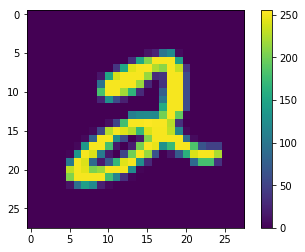

In [5]:
i=5
plt.figure()
plt.imshow(train_images[i])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_images = train_images / 255
test_images = test_images / 255

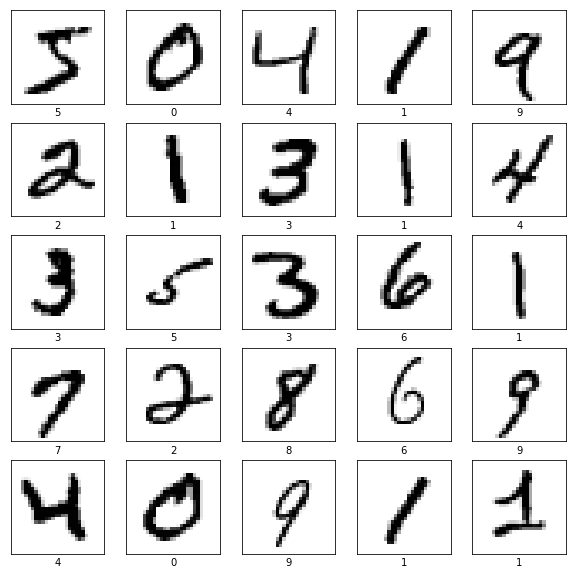

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(digit_class_list[train_labels[i]])
plt.show()

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2583 - accuracy: 0.9260
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1146 - accuracy: 0.9656
Epoch 3/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0797 - accuracy: 0.9755
Epoch 4/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0602 - accuracy: 0.9815
Epoch 5/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0464 - accuracy: 0.9857
Epoch 6/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0363 - accuracy: 0.9883
Epoch 7/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0299 - accuracy: 0.9905
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0237 - accuracy: 0.9926
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0180 - accuracy: 0.9947
Epoch 10/10
60

In [12]:
loss, accuracy = model.evaluate(test_images,  test_labels, verbose=2)
print('Accuracy:', accuracy)

10000/10000 - 0s - loss: 0.0836 - accuracy: 0.9770
Accuracy: 0.977


In [13]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(digit_class_list[predicted_label],
                                100*np.max(predictions_array),
                                digit_class_list[true_label]),
                                color=color)

In [14]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  g_plot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  g_plot[predicted_label].set_color('red')
  g_plot[true_label].set_color('blue')

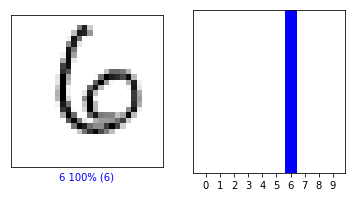

In [15]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()